In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r"F:\College\SEM 8\Project Phase 2\Dataset\NCA Preprocessed\master_features_nca.csv")
df

,filename,cell_id,temp,charge_rate,discharge_rate,cycle,SOH,IC_bin_1,IC_bin_2,IC_bin_3,...,IC_bin_11,IC_bin_12,IC_bin_13,IC_bin_14,IC_bin_15,IC_bin_16,IC_bin_17,IC_bin_18,IC_bin_19,IC_bin_20
0,CY25-025_1-#1.csv,1,25,0.25,1.0,1,99.96,3.206253,3.435524,3.772510,...,4.255246,4.207070,4.229390,4.248806,4.264151,4.198406,4.058616,3.920543,3.792856,3.647914
1,CY25-025_1-#1.csv,1,25,0.25,1.0,2,99.98,3.185611,3.409977,3.737496,...,4.249921,4.223132,4.181276,4.225006,4.231327,4.158785,4.055173,3.905594,3.737473,3.648392
2,CY25-025_1-#1.csv,1,25,0.25,1.0,3,100.00,3.166235,3.397673,3.713245,...,4.235653,4.189766,4.140167,4.167926,4.180849,4.145106,4.015124,3.896722,3.756668,3.646670
3,CY25-025_1-#1.csv,1,25,0.25,1.0,4,99.97,3.139468,3.376350,3.683448,...,4.254307,4.162355,4.134256,4.143371,4.135573,4.118733,4.023064,3.867330,3.752034,3.631178
4,CY25-025_1-#1.csv,1,25,0.25,1.0,5,99.93,3.132129,3.346752,3.653736,...,4.216513,4.164974,4.094929,4.101335,4.135343,4.100581,4.008745,3.881142,3.761407,3.626212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22639,CY45-05_1-#9.csv,9,45,0.50,1.0,411,84.65,2.514883,2.565545,2.627766,...,3.248165,3.376864,3.545380,3.705835,3.774339,3.705556,3.564230,3.413748,3.287599,3.193869
22640,CY45-05_1-#9.csv,9,45,0.50,1.0,412,84.61,2.510205,2.560754,2.625429,...,3.250500,3.392370,3.559592,3.706725,3.763518,3.694866,3.559024,3.417873,3.299083,3.207045
22641,CY45-05_1-#9.csv,9,45,0.50,1.0,413,84.60,2.513525,2.562124,2.623266,...,3.245492,3.372555,3.540142,3.694258,3.752898,3.692722,3.562536,3.425323,3.303745,3.206924
22642,CY45-05_1-#9.csv,9,45,0.50,1.0,414,84.58,2.508238,2.557557,2.619624,...,3.241048,3.372799,3.540815,3.700767,3.761809,3.701606,3.569719,3.425509,3.299934,3.202914


In [3]:
df_one_hot = pd.get_dummies(df, columns=['temp','charge_rate'])
df_one_hot

,filename,cell_id,discharge_rate,cycle,SOH,IC_bin_1,IC_bin_2,IC_bin_3,IC_bin_4,IC_bin_5,...,IC_bin_17,IC_bin_18,IC_bin_19,IC_bin_20,temp_25,temp_35,temp_45,charge_rate_0.25,charge_rate_0.5,charge_rate_1.0
0,CY25-025_1-#1.csv,1,1.0,1,99.96,3.206253,3.435524,3.772510,4.192327,4.376286,...,4.058616,3.920543,3.792856,3.647914,True,False,False,True,False,False
1,CY25-025_1-#1.csv,1,1.0,2,99.98,3.185611,3.409977,3.737496,4.066281,4.266975,...,4.055173,3.905594,3.737473,3.648392,True,False,False,True,False,False
2,CY25-025_1-#1.csv,1,1.0,3,100.00,3.166235,3.397673,3.713245,4.049932,4.278990,...,4.015124,3.896722,3.756668,3.646670,True,False,False,True,False,False
3,CY25-025_1-#1.csv,1,1.0,4,99.97,3.139468,3.376350,3.683448,4.050734,4.300114,...,4.023064,3.867330,3.752034,3.631178,True,False,False,True,False,False
4,CY25-025_1-#1.csv,1,1.0,5,99.93,3.132129,3.346752,3.653736,4.027798,4.299433,...,4.008745,3.881142,3.761407,3.626212,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22639,CY45-05_1-#9.csv,9,1.0,411,84.65,2.514883,2.565545,2.627766,2.699047,2.773160,...,3.564230,3.413748,3.287599,3.193869,False,False,True,False,True,False
22640,CY45-05_1-#9.csv,9,1.0,412,84.61,2.510205,2.560754,2.625429,2.698454,2.772929,...,3.559024,3.417873,3.299083,3.207045,False,False,True,False,True,False
22641,CY45-05_1-#9.csv,9,1.0,413,84.60,2.513525,2.562124,2.623266,2.694897,2.769636,...,3.562536,3.425323,3.303745,3.206924,False,False,True,False,True,False
22642,CY45-05_1-#9.csv,9,1.0,414,84.58,2.508238,2.557557,2.619624,2.690607,2.765388,...,3.569719,3.425509,3.299934,3.202914,False,False,True,False,True,False


In [4]:


# -------------------------
# 0. ONE-HOT encode temp & charge-rate
# -------------------------
df_one_hot = pd.get_dummies(df, columns=['temp','charge_rate'])

# -------------------------
# 1. Drop unused columns
# -------------------------
df_dropped = df_one_hot.drop(columns=['filename', 'cell_id', 'discharge_rate'])

# -------------------------
# 2. Identify columns
# -------------------------
ic_cols = [col for col in df_dropped.columns if 'IC' in col]      # 20 IC bins
cycle_col = 'cycle'
one_hot_cols = [col for col in df_dropped.columns 
                if 'temp_' in col or 'charge_rate_' in col]

# Convert to arrays
X_ic_all = df_dropped[ic_cols].values               # (N,20)
X_cycle_all = df_dropped[[cycle_col]].values        # (N,1)
X_onehot_all = df_dropped[one_hot_cols].values      # (N,6)
Y = df_dropped['SOH'].values                        # (N,)

# ---------------------------------------------------
# 3. Remove NaN / INF first
# ---------------------------------------------------
mask_clean = (
    ~np.isnan(X_ic_all).any(axis=1) &
    ~np.isnan(X_cycle_all).any(axis=1) &
    ~np.isnan(X_onehot_all).any(axis=1) &
    ~np.isnan(Y) &
    ~np.isinf(X_ic_all).any(axis=1) &
    ~np.isinf(X_cycle_all).any(axis=1) &
    ~np.isinf(X_onehot_all).any(axis=1) &
    ~np.isinf(Y)
)

print("Rows removed due to NaN/Inf:", np.sum(~mask_clean))

X_ic_all     = X_ic_all[mask_clean]
X_cycle_all  = X_cycle_all[mask_clean]
X_onehot_all = X_onehot_all[mask_clean]
Y            = Y[mask_clean]


# ---------------------------------------------------
# 4. REMOVE IC OUTLIERS (YOUR RULE: IC < 0 OR IC > 20)
# ---------------------------------------------------
LOW_LIMIT  = 0
HIGH_LIMIT = 20

mask_outlier = np.all(
    (X_ic_all >= LOW_LIMIT) & (X_ic_all <= HIGH_LIMIT),
    axis=1
)

print("Rows removed due to IC outliers:", np.sum(~mask_outlier))

# Apply mask everywhere
X_ic_all     = X_ic_all[mask_outlier]
X_cycle_all  = X_cycle_all[mask_outlier]
X_onehot_all = X_onehot_all[mask_outlier]
Y            = Y[mask_outlier]


# -------------------------
# 5. Train-test split
# -------------------------
X_ic_train, X_ic_test, \
X_cycle_train, X_cycle_test, \
X_onehot_train, X_onehot_test, \
y_train, y_test = train_test_split(
    X_ic_all, X_cycle_all, X_onehot_all, Y,
    train_size=0.8, random_state=42
)

# -------------------------
# 6. Standardize IC bins
# -------------------------
ic_scaler = StandardScaler()
X_ic_train = ic_scaler.fit_transform(X_ic_train)
X_ic_test = ic_scaler.transform(X_ic_test)

# -------------------------
# 7. Standardize cycle number
# -------------------------
cycle_scaler = StandardScaler()
X_cycle_train = cycle_scaler.fit_transform(X_cycle_train)
X_cycle_test = cycle_scaler.transform(X_cycle_test)

# -------------------------
# 8. Build context vector = cycle + one-hot
# -------------------------
X_context_train = np.concatenate([X_cycle_train, X_onehot_train], axis=1)
X_context_test = np.concatenate([X_cycle_test, X_onehot_test], axis=1)

# -------------------------
# 9. Normalize SOH target
# -------------------------
y_mean = y_train.mean()
y_std = y_train.std()

y_train = (y_train - y_mean) / y_std
y_test  = (y_test - y_mean) / y_std

# -------------------------
# 10. Expand dims for CNN/LSTM input
# -------------------------
X_ic_train = np.expand_dims(X_ic_train, axis=2)  
X_ic_test  = np.expand_dims(X_ic_test, axis=2)

# -------------------------
# 11. Print final shapes & ranges
# -------------------------
print("Final IC range:", X_ic_test.min(), X_ic_test.max())
print("IC:", X_ic_train.shape)
print("Context:", X_context_train.shape)
print("Y:", y_train.shape)


Rows removed due to NaN/Inf: 3
Rows removed due to IC outliers: 4
Final IC range: -8.413057359147434 11.611967272321516
IC: (18109, 20, 1)
Context: (18109, 7)
Y: (18109,)


In [5]:
def candw_attack(model, X_ic_test, X_context_test, y_test, attack_weight = 1.0 , lr = 0.01, steps = 100, clip_min = -5.0, clip_max = 7.0):
    X_ic_test = tf.convert_to_tensor(X_ic_test, dtype= tf.float32)
    X_context_test = tf.convert_to_tensor(X_context_test, dtype= tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype= tf.float32)
    y_test = tf.expand_dims(y_test, axis = -1)

    delta = tf.Variable(tf.zeros_like(X_ic_test), trainable=True)

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    for _ in range(steps):
        with tf.GradientTape() as Tape:
            X_ic_adv = X_ic_test + delta
            X_ic_adv = tf.clip_by_value(X_ic_adv, clip_min, clip_max)

            y_pred = model([X_ic_adv, X_context_test], training=False)

            mse = tf.reduce_mean(tf.keras.losses.MSE(y_test, y_pred))

            l2 = tf.reduce_mean(tf.reduce_sum(tf.square(delta), axis =[1,2]))

            loss = l2 - attack_weight * mse
        
        gradient = Tape.gradient(loss, delta)
        optimizer.apply_gradients([(gradient,delta)])

    X_ic_adv = tf.clip_by_value(X_ic_adv + delta, clip_min, clip_max)

    return X_ic_adv.numpy()


In [6]:
from sklearn.metrics import mean_absolute_percentage_error


def attack_eval(model, X_ic_test, X_context_test, y_test, attack_weight = 1.0 , lr = 0.01, steps = 100, clip_min = -3.0, clip_max = 3.0, model_name=""):
    X_ic_adv = candw_attack(model, X_ic_test, X_context_test, y_test, attack_weight, lr, steps, clip_min, clip_max)

    print("-----------------")
    print("Normal Conditions")
    print("-----------------")

    y_pred = model.predict([X_ic_test, X_context_test])
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test,y_pred))
    print("MSE:",mean_squared_error(y_test,y_pred))
    print("MAPE:",mean_absolute_percentage_error(y_test, y_pred))

    print("--------------------------")
    print("C and W attack performance")
    print("--------------------------")

    y_pred_adv = model.predict([X_ic_adv, X_context_test])
    print("R2 Score:", r2_score(y_test, y_pred_adv))
    print("MAE:", mean_absolute_error(y_test,y_pred_adv))
    print("MSE:",mean_squared_error(y_test,y_pred_adv))
    print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))


    print("-----")
    print("PLOTS")
    print("-----")

    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.scatter(y_test, y_pred, alpha = 0.5)
    plt.title(model_name+" Clean Data Predictions")
    min_val = min(min(y_test), min(y_pred))
    max_val = min(max(y_test), max(y_pred))
    plt.plot([min_val,max_val],[min_val,max_val], "r--")
    plt.xlabel("True SOH")
    plt.ylabel("Predicted SOH")
    plt.grid()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_pred_adv, alpha=0.5, color="orange")
    plt.title(model_name+" Attacked Data Predicitions")
    plt.plot([min_val,max_val],[min_val,max_val], "r--")
    plt.xlabel("True SOH")
    plt.ylabel("Predicted SOH")
    plt.grid()
    plt.show()



__CNN + LSTM__

--------
CNN+LSTM
--------
-----------------
Normal Conditions
-----------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
R2 Score: 0.995689151695225
MAE: 0.04511379034759223
MSE: 0.004322675268695433
MAPE: 1.4331428372219905
--------------------------
C and W attack performance
--------------------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
R2 Score: 0.9873655971850153
MAE: 0.07705012978985665
MSE: 0.01266906574341185
MAPE: 1.4331428372219905
-----
PLOTS
-----


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

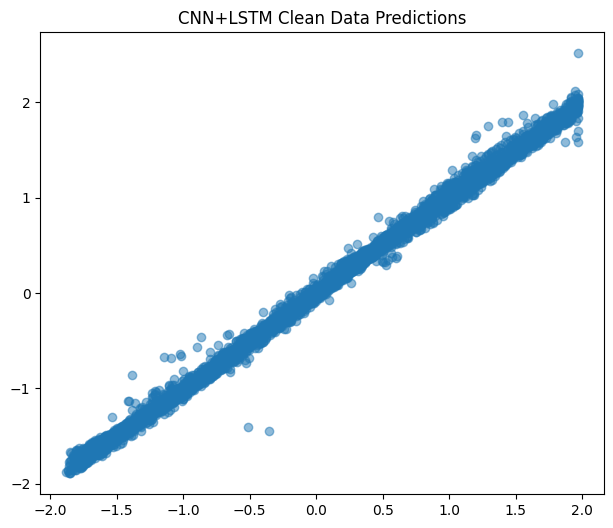

In [8]:
cnn_lstm = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn_lstm.keras") 

print("--------")
print("CNN+LSTM")
print("--------")

attack_eval(cnn_lstm, X_ic_test, X_context_test, y_test, attack_weight = 2.0 , lr = 0.001, steps = 250, clip_min = -9.0, clip_max = 12.0, model_name="CNN+LSTM")


__CNN + GRU__

---------
CNN + GRU
---------
-----------------
Normal Conditions
-----------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
R2 Score: 0.9972670850467044
MAE: 0.03573541200490898
MSE: 0.0027404128015763147
MAPE: 0.451304121874671
--------------------------
C and W attack performance
--------------------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R2 Score: 0.9813285175110215
MAE: 0.08109279987714843
MSE: 0.018722708357792568
MAPE: 0.451304121874671
-----
PLOTS
-----


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

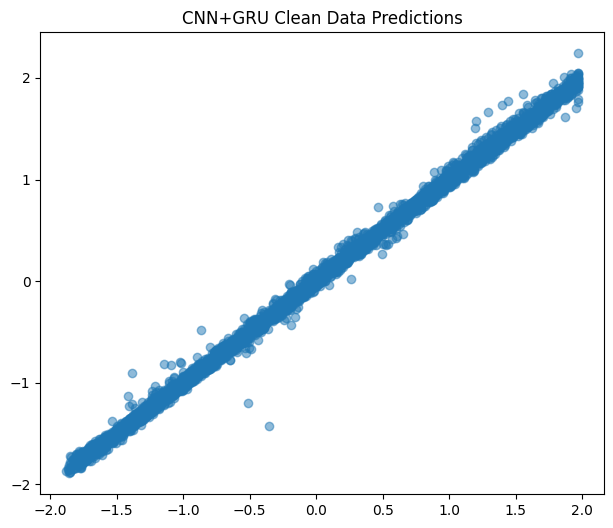

In [11]:
print("---------")
print("CNN + GRU")
print("---------")

cnn_gru = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn_gru_1.keras")
attack_eval(cnn_gru, X_ic_test, X_context_test, y_test, attack_weight=2.0 , lr = 0.001, steps = 250, clip_min = -3.0, clip_max = 3.0, model_name="CNN+GRU")

---
RCN
---
-----------------
Normal Conditions
-----------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R2 Score: 0.9963593762223153
MAE: 0.04451132274039512
MSE: 0.0035955973433850785
MAPE: 0.47440765388510436
--------------------------
C and W attack performance
--------------------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R2 Score: -1.2504752888372028
MAE: 1.2762227733203522
MSE: 2.222641905350314
MAPE: 0.47440765388510436
-----
PLOTS
-----


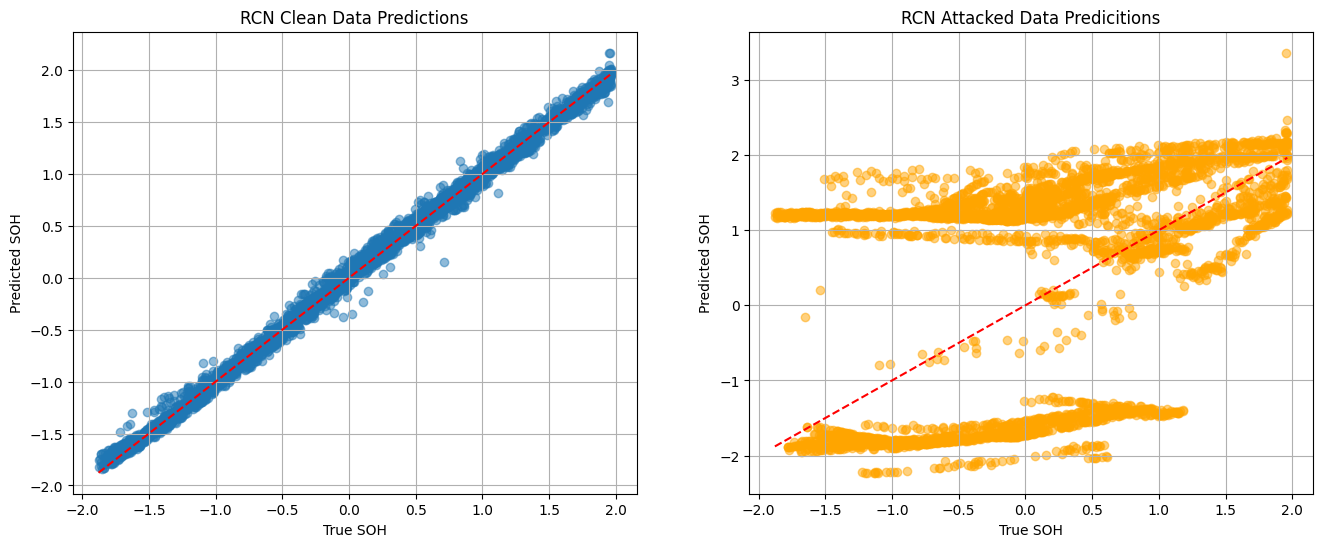

In [44]:
rcn = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_rcn.keras")

print("---")
print("RCN")
print("---")

attack_eval(rcn, X_ic_test, X_context_test, y_test, attack_weight=1.0 , lr = 0.01, steps = 100, clip_min = -3.0, clip_max = 3.0, model_name="RCN")

__CNN__

---
CNN
---
-----------------
Normal Conditions
-----------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
R2 Score: 0.9848092259048676
MAE: 0.09442292512359997
MSE: 0.015002897941615016
MAPE: 0.5742935546369837
--------------------------
C and W attack performance
--------------------------
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 Score: -2.417373734442813
MAE: 1.346459414976955
MSE: 3.375108407584719
MAPE: 0.5742935546369837
-----
PLOTS
-----


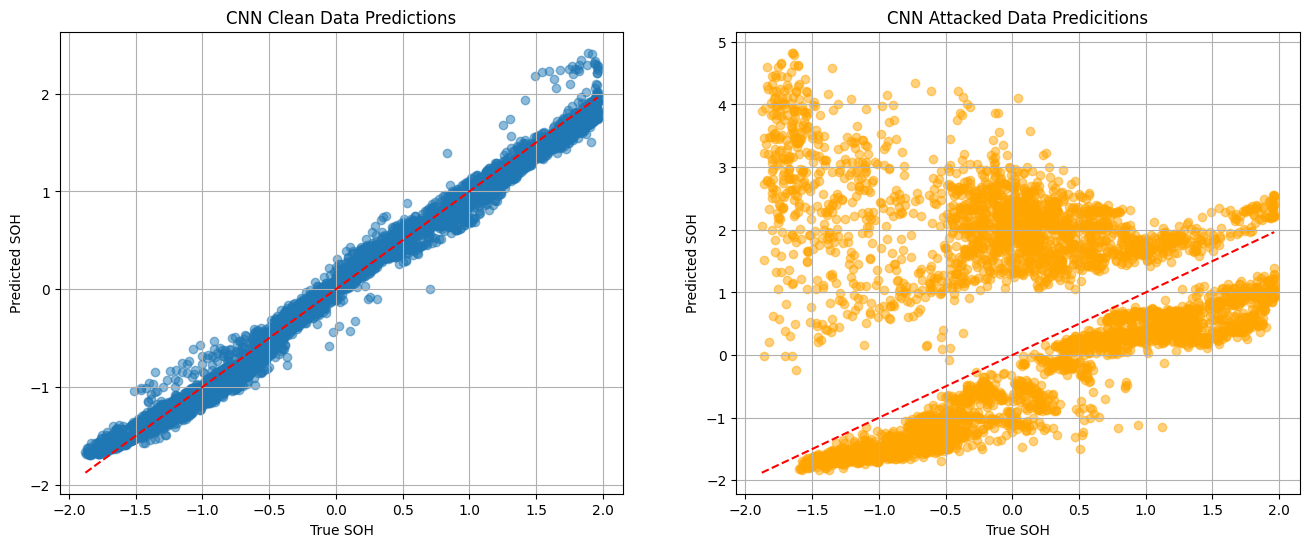

In [45]:
print("---")
print("CNN")
print("---")

cnn = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn.keras")

attack_eval(cnn, X_ic_test, X_context_test, y_test, attack_weight=1.0 , lr = 0.01, steps = 100, clip_min = -3.0, clip_max = 3.0, model_name="CNN")

In [50]:
idx = 100   

orig_ic = X_ic_test[idx].reshape(-1)     
orig_ctx = X_context_test[idx].reshape(1,-1)
orig_true = y_test[idx]

adv_ic = candw_attack(
    cnn_gru,
    X_ic_test[idx:idx+1],     
    X_context_test[idx:idx+1],
    y_test[idx:idx+1]
)

adv_ic = adv_ic.reshape(-1)

y_pred_orig = cnn_gru.predict([X_ic_test[idx:idx+1], X_context_test[idx:idx+1]])[0][0]
y_pred_adv  = cnn_gru.predict([adv_ic.reshape(1,-1,1), X_context_test[idx:idx+1]])[0][0]

y_pred_orig = y_pred_orig * y_std + y_mean
y_pred_adv = y_pred_adv * y_std + y_mean

orig_true = orig_true * y_std + y_mean

print("Original pred:", y_pred_orig)
print("Adversarial pred:", y_pred_adv)
print("True value:", orig_true)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Original pred: 85.74653687359482
Adversarial pred: 98.46373364192964
True value: 85.45


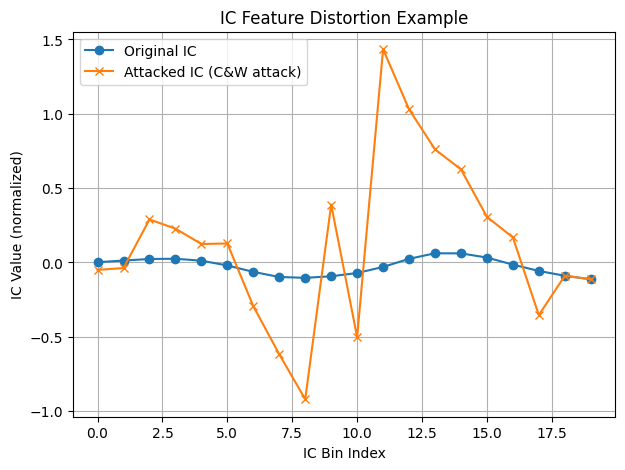

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(orig_ic, marker='o', label="Original IC")
plt.plot(adv_ic, marker='x', label="Attacked IC (C&W attack)")
plt.title("IC Feature Distortion Example")
plt.xlabel("IC Bin Index")
plt.ylabel("IC Value (normalized)")
plt.legend()
plt.grid(True)
plt.show()
